In [2]:
import os
import numpy as np
import keras
from keras.applications import inception_v3
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
import sys
from skimage.segmentation import mark_boundaries
from functools import partial
%matplotlib inline
from sklearn.metrics import silhouette_score
print 'Notebook run using keras:', keras.__version__

Notebook run using keras: 2.1.6


In [3]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image, grid_segmentation, evaluation_measures, helper_functions, clustering

In [4]:
model = inception_v3.InceptionV3()

In [5]:
def transform_img_fn(path_list):
    path_list = sorted(path_list)
    out = []
    for i in range(len(path_list)):
        img = image.load_img(path_list[i], target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inception_v3.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

(u'n02948072', u'candle', 0.504494)
(u'n07697537', u'hotdog', 0.110898115)
(u'n07615774', u'ice_lolly', 0.04283245)
(u'n03871628', u'packet', 0.03882649)
(u'n01983481', u'American_lobster', 0.023594541)


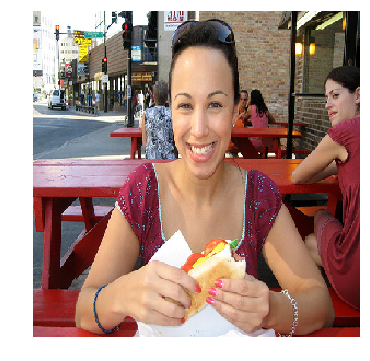

In [6]:
path_of_used_image = '../../../chosen_1000_images/ILSVRC2012_val_00029037.JPEG'
label = 271
images = transform_img_fn([path_of_used_image])
plt.figure(figsize=(6,6))
plt.imshow(images[0] / 2 + 0.5)
plt.axis('off')

preds = model.predict(images)
decoded = decode_predictions(preds)[0]
for r in decoded: 
    print r

In [7]:
abs_paths = sorted(helper_functions.absoluteFilePaths("../../../chosen_1000_images/"))
image_pool = transform_img_fn(abs_paths)

## testing newest version of lime

In [8]:
%%time
from functools import partial

explainer = lime_image.LimeImageEnhancedPatchworkExplainer(image_pool=image_pool)

explanation, sam = explainer.explain_instance(images[0], 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=100,
                                         return_sample_neighborhood_images=True,
                                         segmentation_fn=partial(grid_segmentation.gridSegmentation,8))

CPU times: user 3min 12s, sys: 10.2 s, total: 3min 22s
Wall time: 48.2 s


(-0.5, 298.5, 298.5, -0.5)

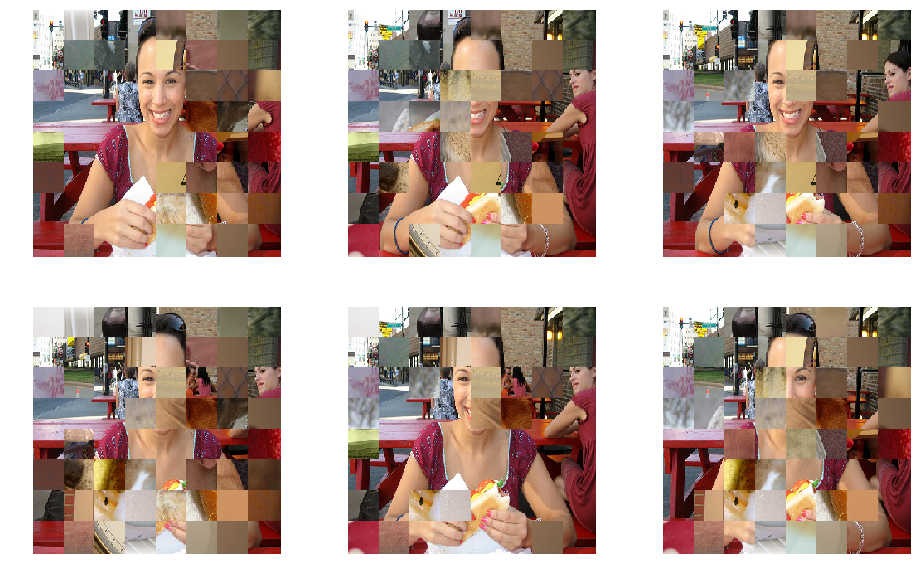

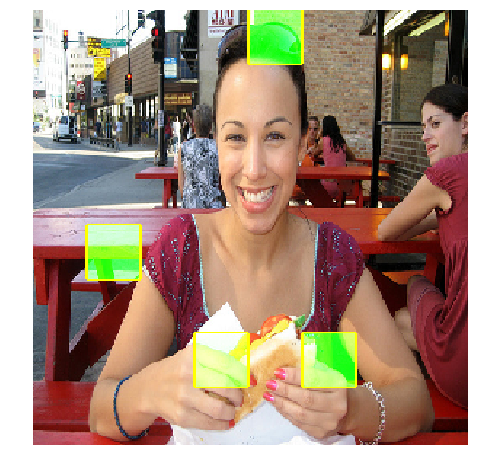

In [15]:
helper_functions.grid_plot( [s/2 + 0.5 for s in sam][:6], (2,3), size_of_figures=(16,10) )
temp, mask = explanation.get_image_and_mask(470, positive_only=True, 
                                                                    num_features=4, hide_rest=False)
exp_image = (mark_boundaries(temp/2+0.5, mask))

plt.figure(figsize=(8,8))
plt.imshow(exp_image)
plt.axis('off')

In [7]:
from functools import partial

explainer = lime_image.LimeImagePatchworkExplainer(image_pool=image_pool)

explanation, sam = explainer.explain_instance(images[0], 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=100,
                                         return_sample_neighborhood_images=True,
                                         segmentation_fn=partial(grid_segmentation.gridSegmentation,8))

(-0.5, 298.5, 298.5, -0.5)

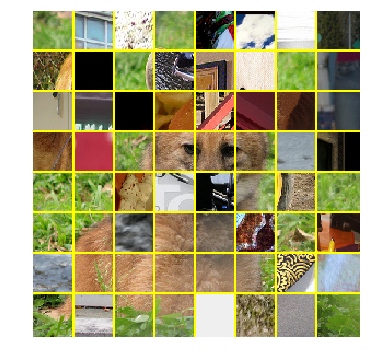

In [40]:
plt.figure(figsize=(6,6))
plt.imshow(mark_boundaries(sam[2]/2+0.5, explanation.segments))
plt.axis('off')

In [60]:
classic_explainer = lime_image.LimeImageExplainer(verbose=False)

classic_explanation,sam = classic_explainer.explain_instance(images[0], 
                                                         model.predict, 
                                                         top_labels=1, 
                                                         hide_color=0, 
                                                         num_samples=100,
                                                         return_sample_neighborhood_images=True)

(-0.5, 298.5, 298.5, -0.5)

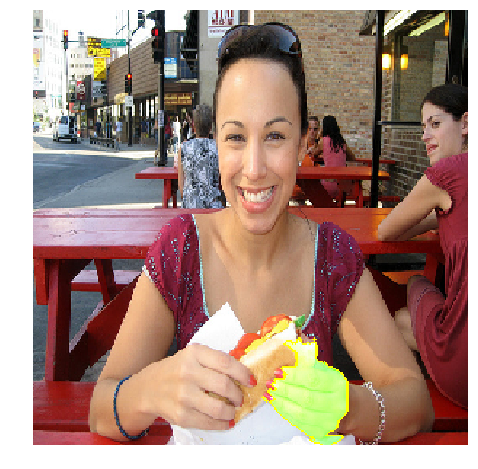

In [74]:
temp,mask = classic_explanation.get_image_and_mask(470, positive_only=True, num_features=1, hide_rest=False)
classic_image = (mark_boundaries(temp/2+0.5, mask))

plt.figure(figsize=(8,8))
plt.imshow(classic_image)
plt.axis('off')

(-0.5, 298.5, 298.5, -0.5)

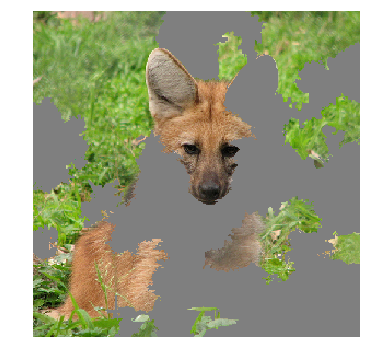

In [19]:
plt.figure(figsize=(6,6))
plt.imshow((sam[0]/2+0.5))
plt.axis('off')

(u'n04482393', u'tricycle', 0.965758)
(u'n03623198', u'knee_pad', 0.005162644)
(u'n03877472', u'pajama', 0.00093243003)
(u'n03825788', u'nipple', 0.0006586588)
(u'n04462240', u'toyshop', 0.00049300154)


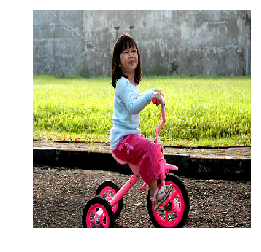

In [6]:
path_of_used_image = '../../../chosen_1000_images/ILSVRC2012_val_00001342.JPEG'
images = transform_img_fn([path_of_used_image])
plt.imshow(images[0] / 2 + 0.5)
plt.axis('off')

preds = model.predict(images)
decoded = decode_predictions(preds)[0]
for r in decoded: 
    print r

In [7]:
label_to_exp = 870

## lime_

In [7]:
%%time
classic_explainer = lime_image.LimeImageExplainer(verbose=False)

classic_explanation,sam = classic_explainer.explain_instance(images[0], 
                                                         model.predict, 
                                                         top_labels=1, 
                                                         hide_color=None, 
                                                         num_samples=100,
                                                         return_sample_neighborhood_images=True)

CPU times: user 2min 54s, sys: 11 s, total: 3min 5s
Wall time: 27.3 s


(-0.5, 298.5, 298.5, -0.5)

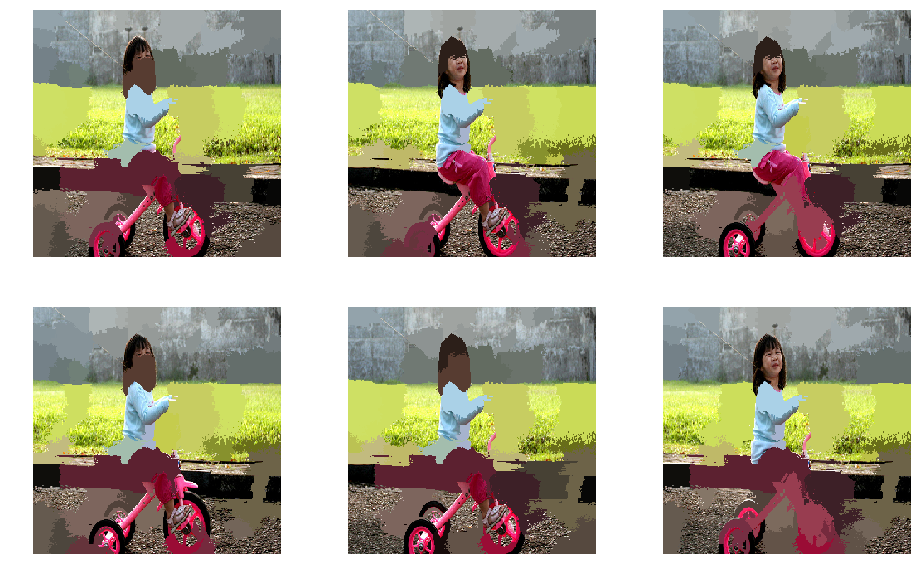

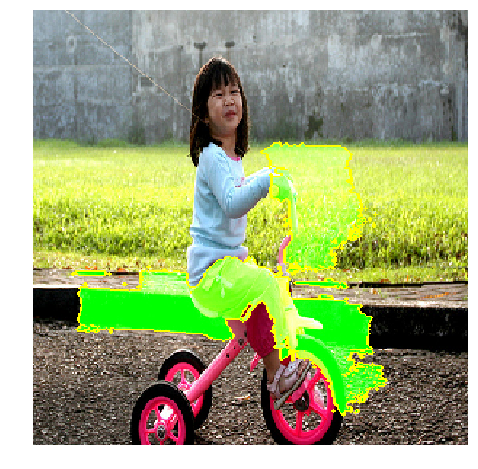

In [11]:
helper_functions.grid_plot(\
    [s/2 + 0.5 for s in sam][:6], (2,3), size_of_figures=(16,10))

temp_classic, mask_classic = classic_explanation.get_image_and_mask(label_to_exp, positive_only=True, 
                                                                    num_features=3, hide_rest=False)
classic_image = (mark_boundaries(temp_classic/2+0.5, mask_classic))

plt.figure(figsize=(8,8))
plt.imshow(classic_image)
plt.axis('off')

## lime#_color

In [8]:
from functools import partial

explainer = lime_image.LimeImageExplainer()

explanation, sam = explainer.explain_instance(images[0], 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=None, 
                                         num_samples=100,
                                         return_sample_neighborhood_images=True,
                                         segmentation_fn=partial(grid_segmentation.gridSegmentation,8))

(-0.5, 298.5, 298.5, -0.5)

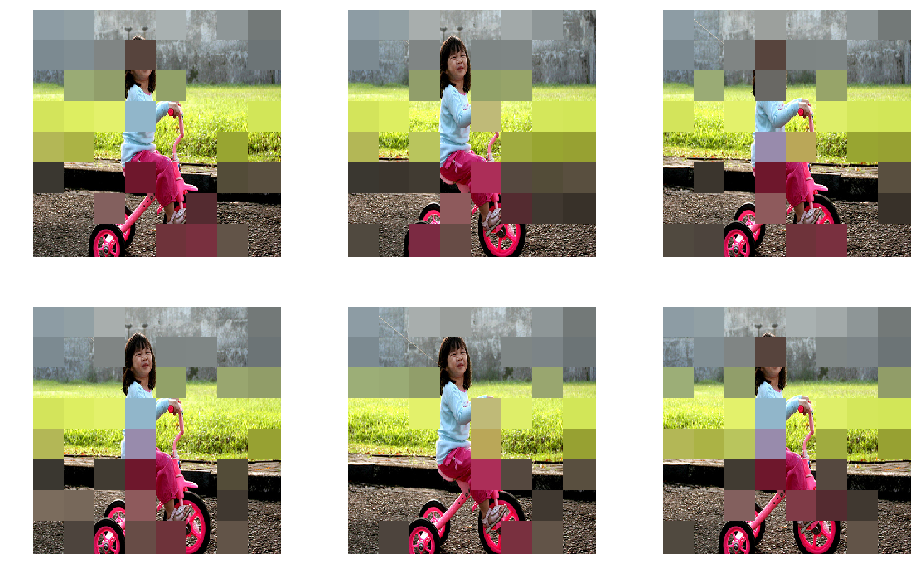

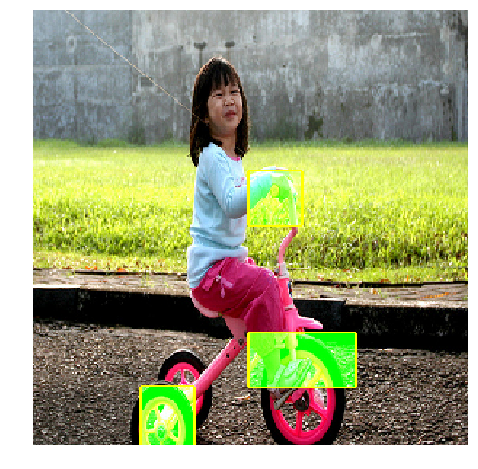

In [12]:
helper_functions.grid_plot(\
    [s/2 + 0.5 for s in sam][:6], (2,3), size_of_figures=(16,10))

temp, mask = explanation.get_image_and_mask(label_to_exp, positive_only=True, 
                                                                    num_features=4, hide_rest=False)
temp = (mark_boundaries(temp/2+0.5, mask))

plt.figure(figsize=(8,8))
plt.imshow(temp)
plt.axis('off')

## lime#_

In [22]:
from functools import partial

explainer = lime_image.LimeImageExplainer()

explanation, sam = explainer.explain_instance(images[0], 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=100,
                                         return_sample_neighborhood_images=True,
                                         segmentation_fn=partial(grid_segmentation.gridSegmentation,8))

(-0.5, 298.5, 298.5, -0.5)

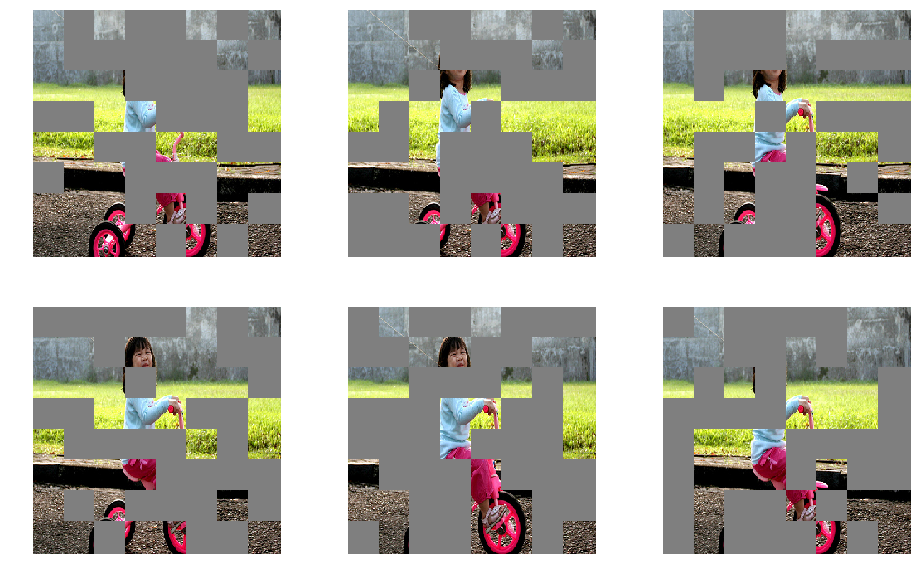

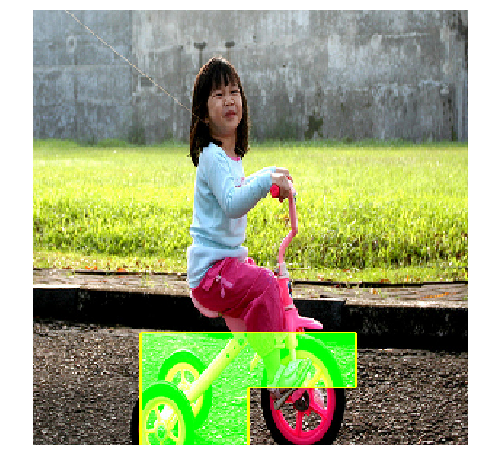

In [25]:
helper_functions.grid_plot(\
    [s/2 + 0.5 for s in sam][:6], (2,3), size_of_figures=(16,10))

temp, mask = explanation.get_image_and_mask(label_to_exp, positive_only=True, 
                                                                    num_features=6, hide_rest=False)
temp = (mark_boundaries(temp/2+0.5, mask))

plt.figure(figsize=(8,8))
plt.imshow(temp)
plt.axis('off')

## lime#R_ 

In [12]:
abs_paths = sorted(helper_functions.absoluteFilePaths("../../../chosen_1000_images/"))
image_pool = transform_img_fn(abs_paths)

In [ ]:
from functools import partial

explainer = lime_image.LimeImagePatchworkExplainer(image_pool=image_pool)

explanation, sam = explainer.explain_instance(images[0], 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=100,
                                         return_sample_neighborhood_images=True,
                                         segmentation_fn=partial(grid_segmentation.gridSegmentation,8))

(-0.5, 298.5, 298.5, -0.5)

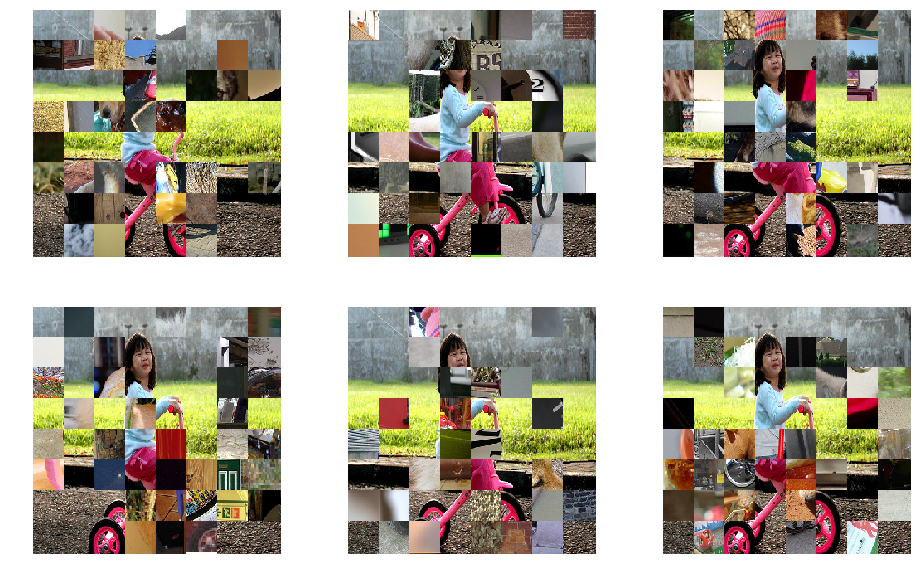

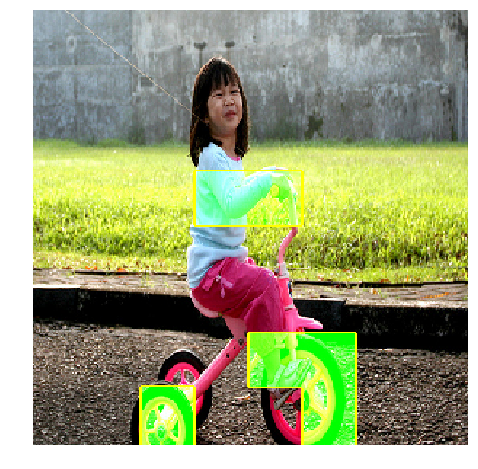

In [18]:
helper_functions.grid_plot(\
    [s/2 + 0.5 for s in sam][:6], (2,3), size_of_figures=(16,10))

temp, mask = explanation.get_image_and_mask(label_to_exp, positive_only=True, 
                                                                    num_features=6, hide_rest=False)
temp = (mark_boundaries(temp/2+0.5, mask))

plt.figure(figsize=(8,8))
plt.imshow(temp)
plt.axis('off')

## lime#C_

In [9]:
abs_paths = sorted(abs_paths)
index_of_image = abs_paths.index(os.path.abspath(path_of_used_image))
print index_of_image

31


In [10]:
sys.path.append('../../lime')
import clustering

In [11]:
path_of_imgs = sorted(helper_functions.absoluteFilePaths('../../../chosen_1000_images_resized'))

In [26]:
resized_images = clustering.load_images(path_of_imgs)

In [27]:
und = clustering.undersample_images(resized_images, 8)
flattened = clustering.flatten_images(und)

In [28]:
chosen_k = 17
compactness, labels, centers = clustering.k_means(flattened, chosen_k)

In [37]:
same_clus = [im for im, lab in zip(image_pool, labels) \
             if lab == labels[index_of_image]]

In [30]:
explainer = lime_image.LimeImagePatchworkExplainer(image_pool=image_pool)

explanation, sam = explainer.explain_instance(images[0], 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=100,
                                         return_sample_neighborhood_images=True,
                                         segmentation_fn=partial(grid_segmentation.gridSegmentation,8))

(-0.5, 298.5, 298.5, -0.5)

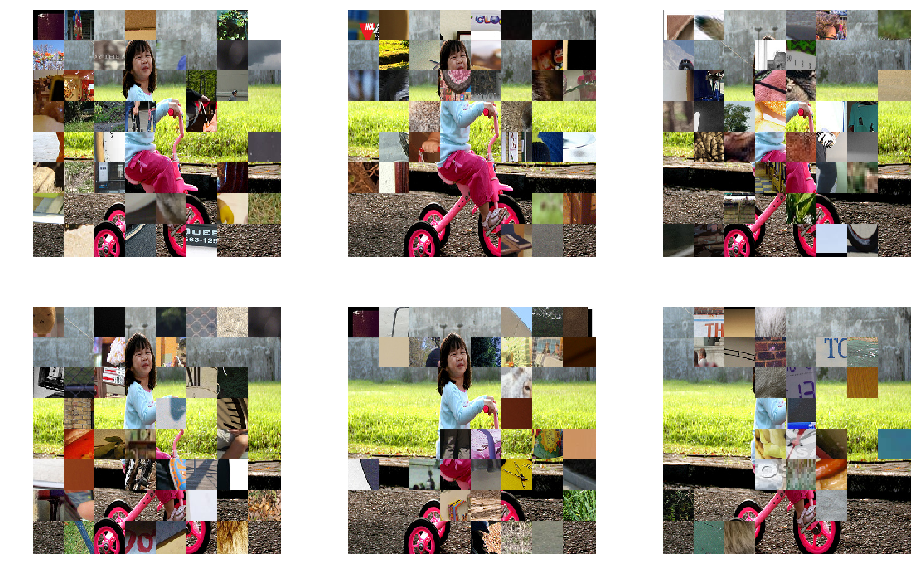

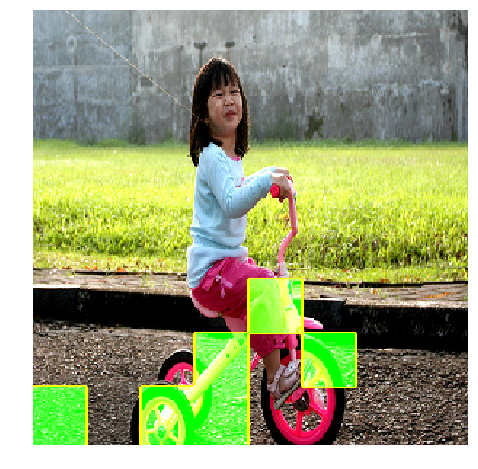

In [34]:
helper_functions.grid_plot(\
    [s/2 + 0.5 for s in sam][:6], (2,3), size_of_figures=(16,10))

temp, mask = explanation.get_image_and_mask(label_to_exp, positive_only=True, 
                                                                    num_features=6, hide_rest=False)
temp = (mark_boundaries(temp/2+0.5, mask))

plt.figure(figsize=(8,8))
plt.imshow(temp)
plt.axis('off')

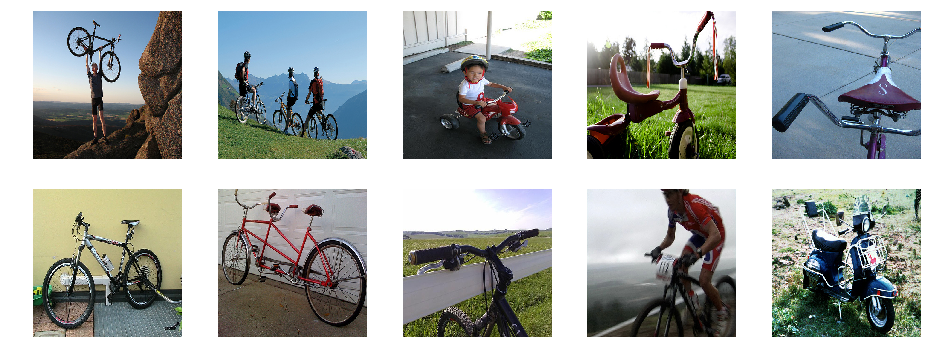

In [52]:
from random import sample
indexes = [6, 11, 13, 33, 41, 23, 28, 27, 40, 31]
helper_functions.grid_plot([x/2+0.5 for x in np.array(same_clus)[indexes]], (2,5), size_of_figures=(16,6))
#helper_functions.grid_plot([same_clus[i]/2+0.5 for i in range(len(same_clus))], (11,6), size_of_figures=(16,26))